# Credit Card Clustering
## Project Description
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during 6 months. The file is at customer level with 18 behavioral variables. You need to develop a customer segmentation to define marketing strategy from the dataset.

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

## Objective
There are a lot of features in this dataset (18 behavioral features). We will now perform:
- Data preproccesing
- Clustering
- Feature extraction to improve clustering
- Experiment with various clustering models. KMeans, Agglomerative Hierachical, Gaussian Mixture
- Choosing the number of clusters
- EDA to segment the customers
- Concluding the project by giving marketing strategy based on whay we learn from the data

## Data Description
Link to the dataset: [Kaggle link](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
 -PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user


## Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

### Load the data

In [49]:
data=pd.read_csv('CC GENERAL.csv')

## Data overview

In [50]:
print(f'Data shape: {str(data.shape)}')
data.head(5)

Data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [51]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Cleaning
First, we check the missing/corrupted values.

In [52]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We will inpute these missing values with the median value.

In [53]:
# impute with median

data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=data['CREDIT_LIMIT'].median()

In [54]:
# double check
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we drop CUST_ID column, then normalize the input values using StandardScaler().

In [55]:
# Drop ID column
data=data.drop('CUST_ID', axis=1)

# Normalize values
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(f"Data scaled shape: {data_scaled.shape}")

Data scaled shape: (8950, 17)


In [56]:
data_imputed=pd.DataFrame(data_scaled, columns=data.columns)

We should now be good to go for clustering.

## Clustering
## Correlation Check

<Axes: >

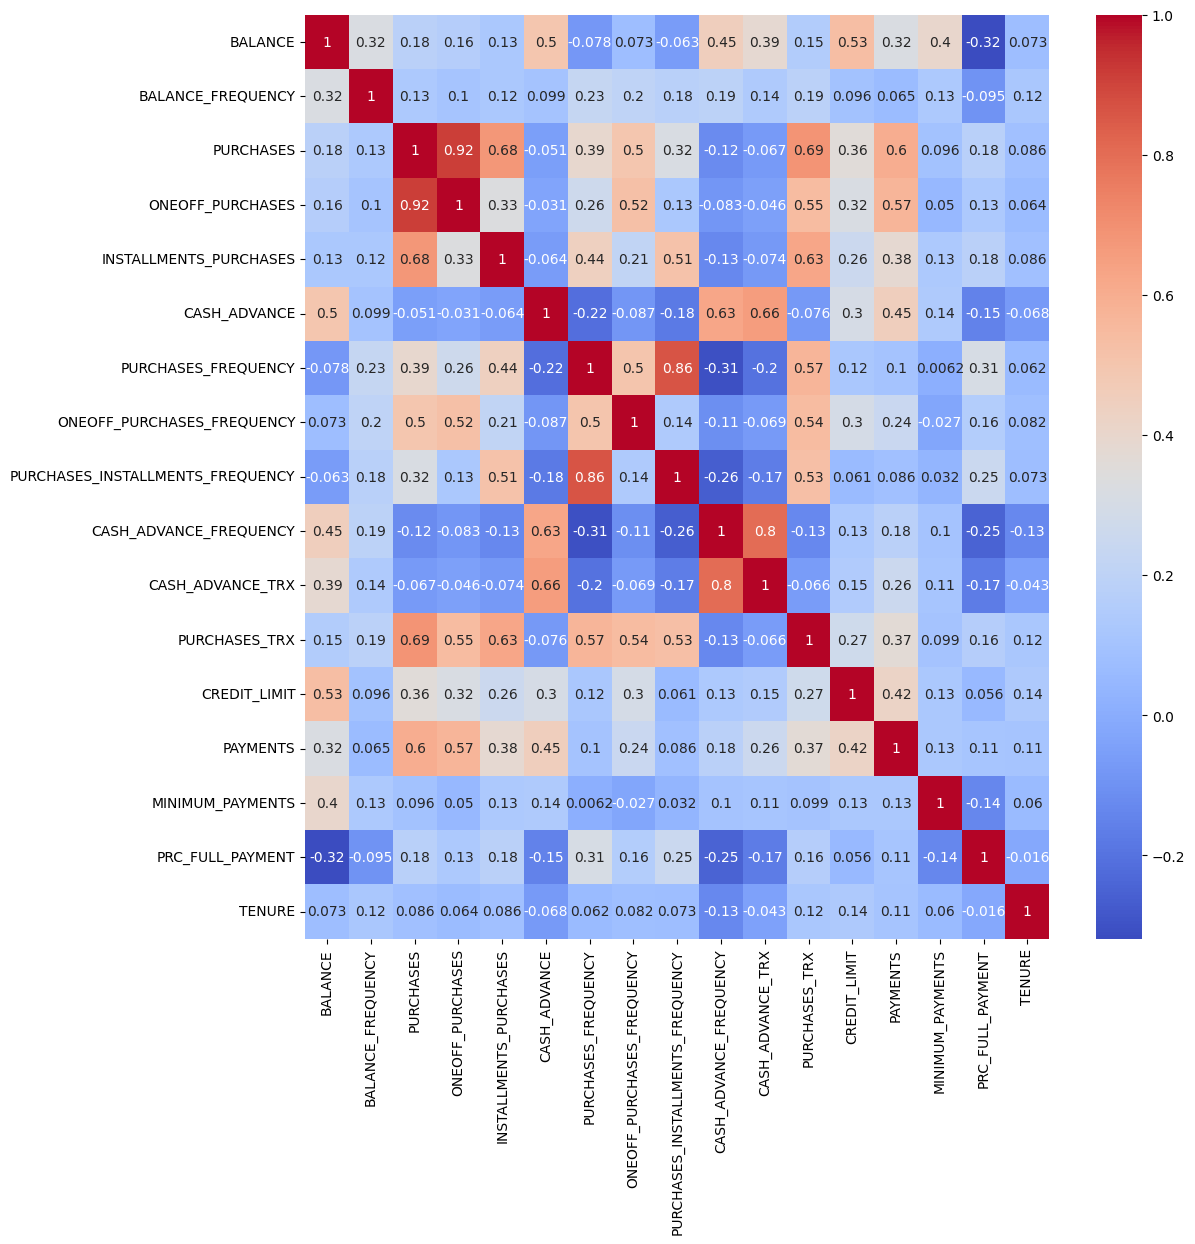

In [57]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm',
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

### Clustering using K-Means
In this section we will perform K-Means clustering on the data and check the clustering metrics (inertia, silhoutte scores).
#### Inertia Plot
This plot is a visualization used to determine the optimal number of clusters in a dataset based on the inertia values of different cluster solutions. The inertia plot typically displays the number of clusters (k) on the x-axis and the corresponding inertia values on the y-axis. As the numer of clusters increases, the inertia usually decreases because smaller clusters result in smaller distances between samples and their cluster centers. However, beyond a certain point, the decrease in inertia becomes marginal, and adding more clusters may not significantly reduce inertia.<br><br>
The "elbow point' in the inertia plot is often used as a heuristic to determine the iptimal number of clusters.

In [58]:
# Inertia plotter function

def inertia_plot(clust, X, start=2, stop=20):
    inertia=[]
    for x in range(start, stop):
        km=clust(n_clusters=x)
        labels=km.fit_predict(X)
        inertia.append(km.inertia_)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(start, stop), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

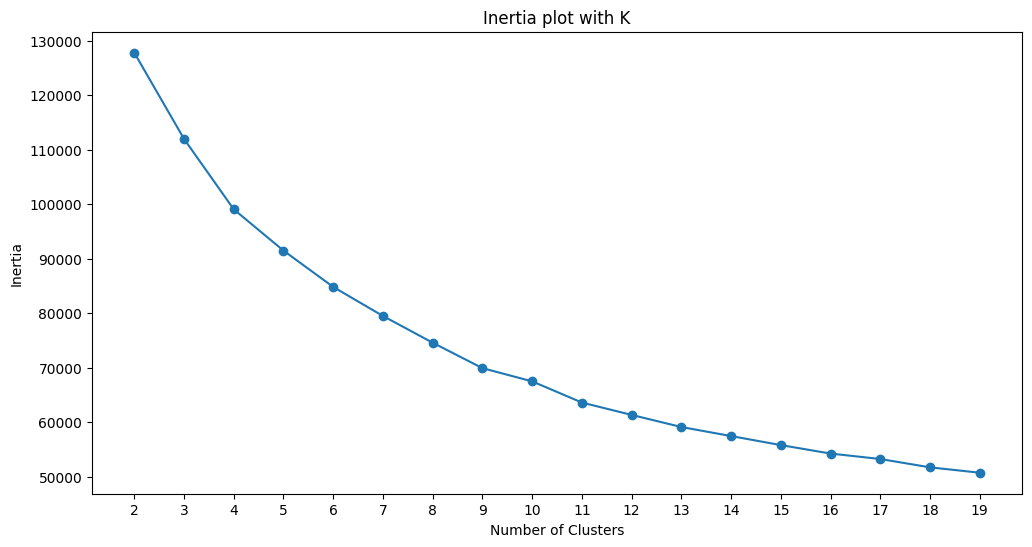

In [59]:
inertia_plot(KMeans, data_imputed)

Using the elbow method, we pick a good number of clusters to be 6.
### Silhoutte Scores
Silhoute analysis can be used to study the separation distance between the resulting clusters. The silhoute plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].<br><br>
We will now checj the silhoutte scores for different numbers of clusters.

In [60]:
def silh_samp_cluster(clust, X, start=2, stop=5, metric='euclidean'):
    # taken from Sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km=clust(n_clusters=x)
        y_km=km.fit_predict(X)
        cluster_labels=np.unique(y_km)
        n_clusters=cluster_labels.shape[0]
        silhouette_vals=silhouette_samples(X, y_km, metric=metric)
        y_ax_lower, y_ax_upper=0,0
        yticks=[]
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals=silhouette_vals[y_km==c]
            c_silhouette_vals.sort()
            y_ax_upper+=len(c_silhouette_vals)
            color=cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                     c_silhouette_vals,
                     height=1.0,
                     edgecolor='none',
                     color=color)
            yticks.append((y_ax_lower+y_ax_upper)/2.)
            y_ax_lower+=len(c_silhouette_vals)
        
        silhouette_avg=np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                    color='red',
                    linestyle='--')
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel("Silhouette Coefficient")
        plt.title(f"Silhoutter for {x} Clusters")
        plt.show()

In [61]:
for x in range(2, 7):
    alg=KMeans(n_clusters=x, )
    label=alg.fit_predict(data_imputed)
    print(f"Silhouette-Score for {x} Clusters: {silhouette_score(data_imputed, label)}")

Silhouette-Score for 2 Clusters: 0.20994376741153917
Silhouette-Score for 3 Clusters: 0.25098792290537314
Silhouette-Score for 4 Clusters: 0.1976791965228765
Silhouette-Score for 5 Clusters: 0.19325195080511473
Silhouette-Score for 6 Clusters: 0.20275660861622877


Silhouette plots:

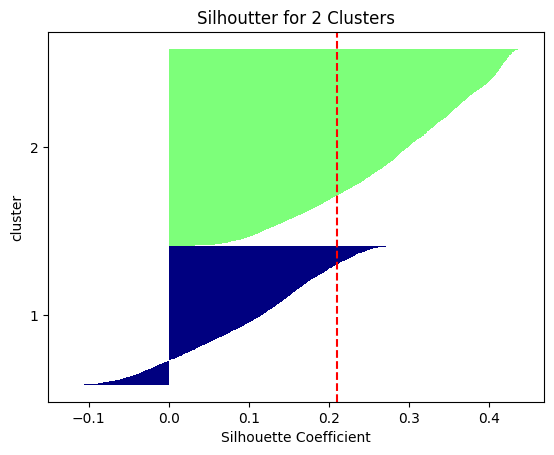

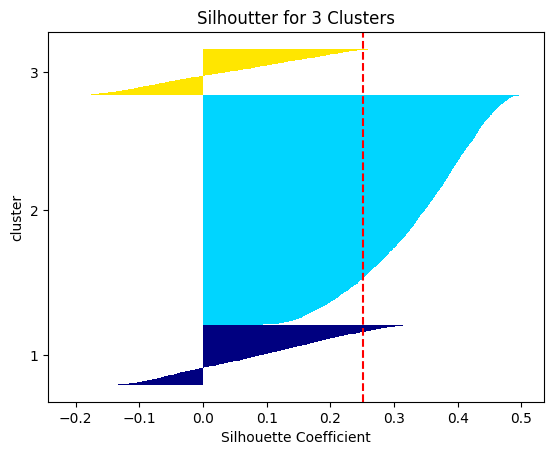

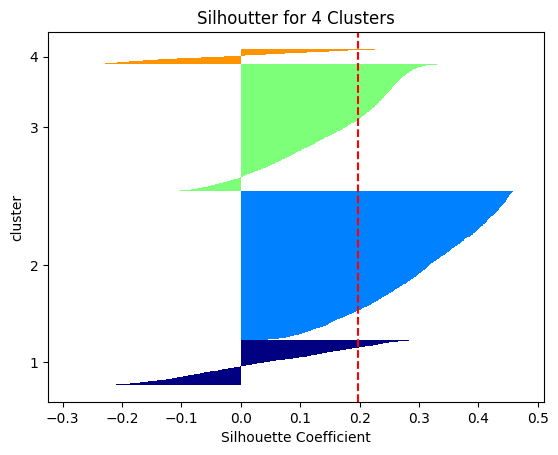

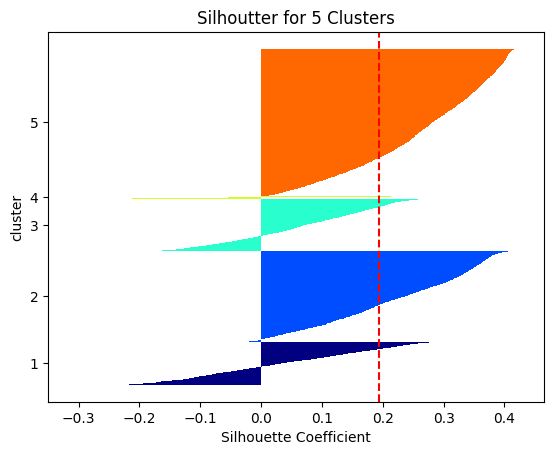

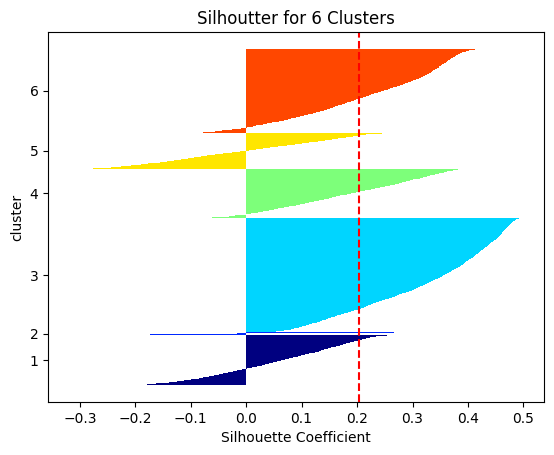

In [62]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

So far, we have a high average inertia, low silhouette scores, and very wide fluctuations in the size of the silhouette plots. This is not good. Let's apply feature extraction with PCA to improve clustering.

### Feature Extraction with PCA
#### Clustering Metrics
Now we will apply PCA to improve clustering. We should be able to see lower inertias and highers silhoutte scores after feature extraction.

In [63]:
# Apply PCA and display clustering metrics

for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca=PCA(n_components=y)
    data_p=pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg=KMeans(n_clusters=x,)
        label=alg.fit_predict(data_p)
        print(f"Silhouette-Score for {x} Clusters: {np.round(silhouette_score(data_p, label), 5)} \t Inertia: {np.round(alg.inertia_, 5)}")
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters: 0.46455 	 Inertia: 49682.7915
Silhouette-Score for 3 Clusters: 0.45198 	 Inertia: 33031.51381
Silhouette-Score for 4 Clusters: 0.40736 	 Inertia: 24544.39642
Silhouette-Score for 5 Clusters: 0.40092 	 Inertia: 19475.63287
Silhouette-Score for 6 Clusters: 0.38553 	 Inertia: 16233.30576

PCA with # of components:  3
Silhouette-Score for 2 Clusters: 0.34155 	 Inertia: 62044.50794
Silhouette-Score for 3 Clusters: 0.38011 	 Inertia: 46325.33463
Silhouette-Score for 4 Clusters: 0.36923 	 Inertia: 34659.21568
Silhouette-Score for 5 Clusters: 0.36831 	 Inertia: 28591.2544
Silhouette-Score for 6 Clusters: 0.33073 	 Inertia: 24847.73737

PCA with # of components:  4
Silhouette-Score for 2 Clusters: 0.30583 	 Inertia: 73185.0165
Silhouette-Score for 3 Clusters: 0.34338 	 Inertia: 57561.02491
Silhouette-Score for 4 Clusters: 0.32192 	 Inertia: 45288.08457
Silhouette-Score for 5 Clusters: 0.32007 	 Inertia: 39166.95018
Silhouette-Score f

As you can see, 2 PCA components with 5-6 clusters would be our best bet.

## Visualization

Text(0, 0.5, 'PC2')

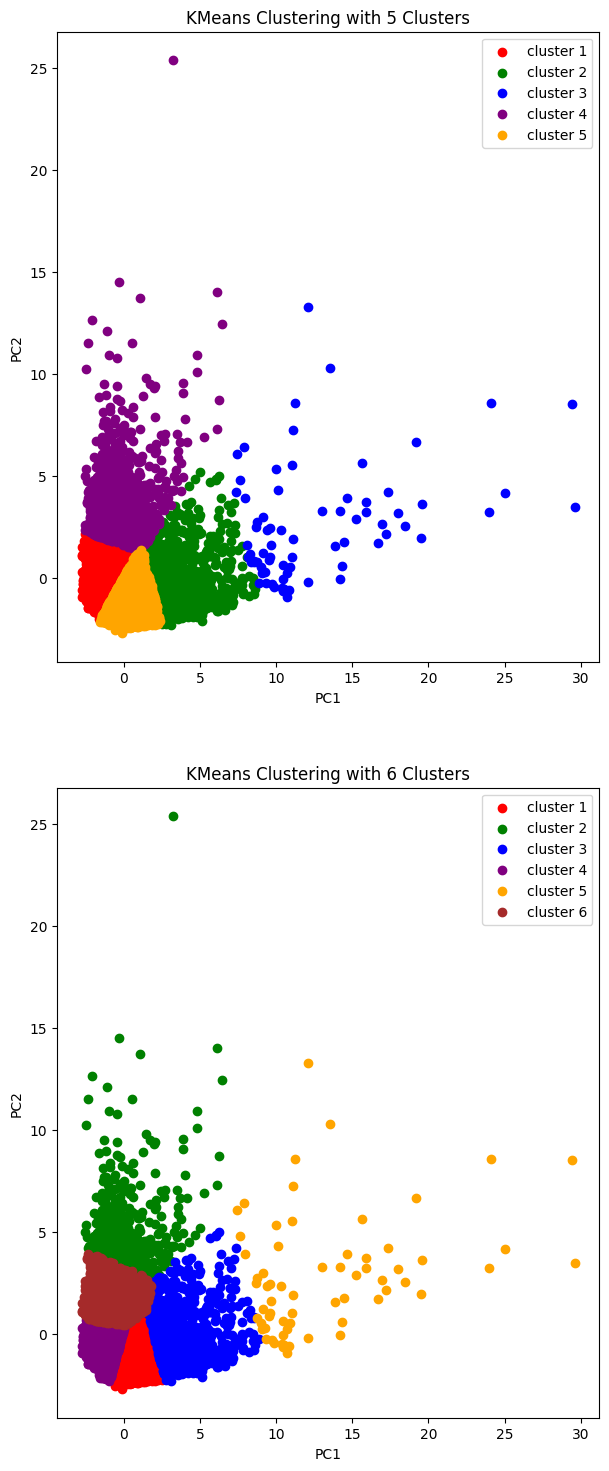

In [64]:
data_p=pd.DataFrame(PCA(n_components=2).fit_transform(data_imputed))
preds=pd.Series(KMeans(n_clusters=5,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis=1)
data_p.columns=[0,1,'target']

#fig=plt.figure(figsize=(18, 7))
fig=plt.figure(figsize=(7, 18))
colors=['red', 'green', 'blue', 'purple', 'orange', 'brown']
#plt.subplot(121)
plt.subplot(211)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c=colors[0], label='cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c=colors[1], label='cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c=colors[2], label='cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c=colors[3], label='cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c=colors[4], label='cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

data_p=pd.DataFrame(PCA(n_components=2).fit_transform(data_imputed))
preds=pd.Series(KMeans(n_clusters=6,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis=1)
data_p.columns=[0,1,'target']

#plt.subplot(122)
plt.subplot(212)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c=colors[0], label='cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c=colors[1], label='cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c=colors[2], label='cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c=colors[3], label='cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c=colors[4], label='cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c=colors[5], label='cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

So far, by applying PCA we have made notable improvement to KMeans model. Let's try other clustering models as well.

### Agglomerative Hierarchical Clustering with PCA

Text(0, 0.5, 'PC2')

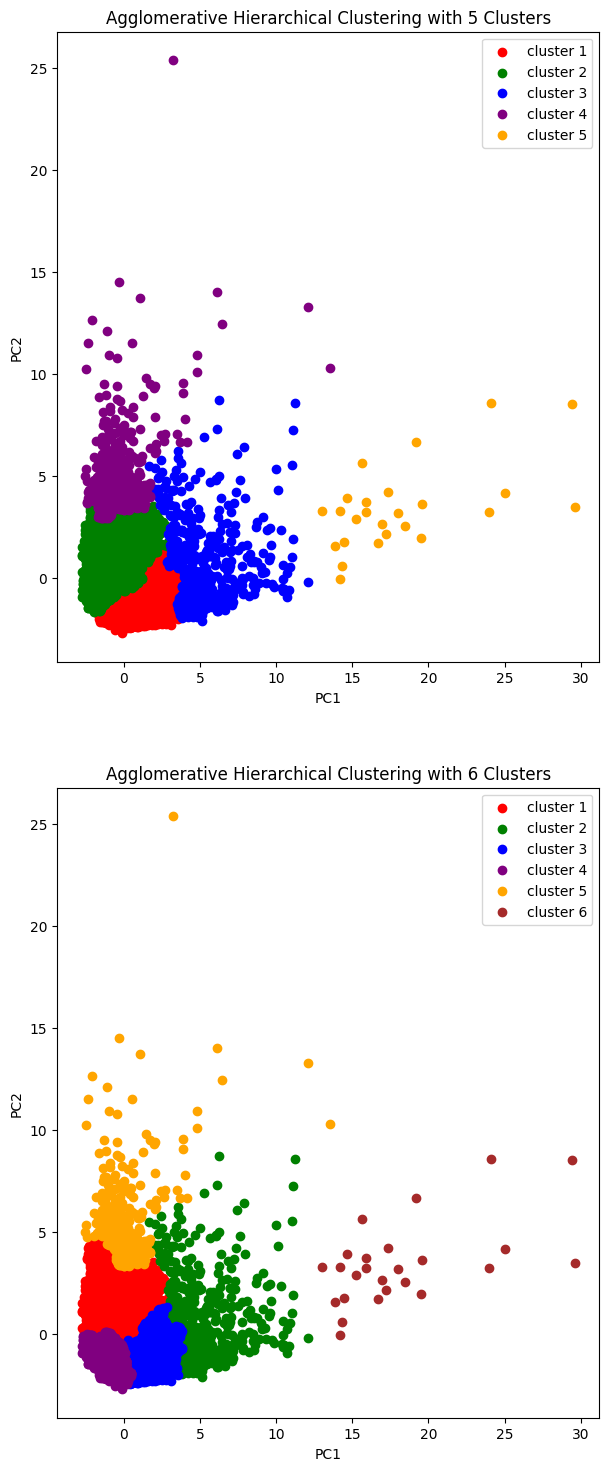

In [65]:
data_p=pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds=pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig=plt.figure(figsize=(7, 18))
colors=['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(211)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

data_p=pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds=pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(212)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title("Agglomerative Hierarchical Clustering with 6 Clusters")
plt.xlabel('PC1')
plt.ylabel('PC2')

### Gaussian Mixture Clustering with PCA

Text(0, 0.5, 'PC2')

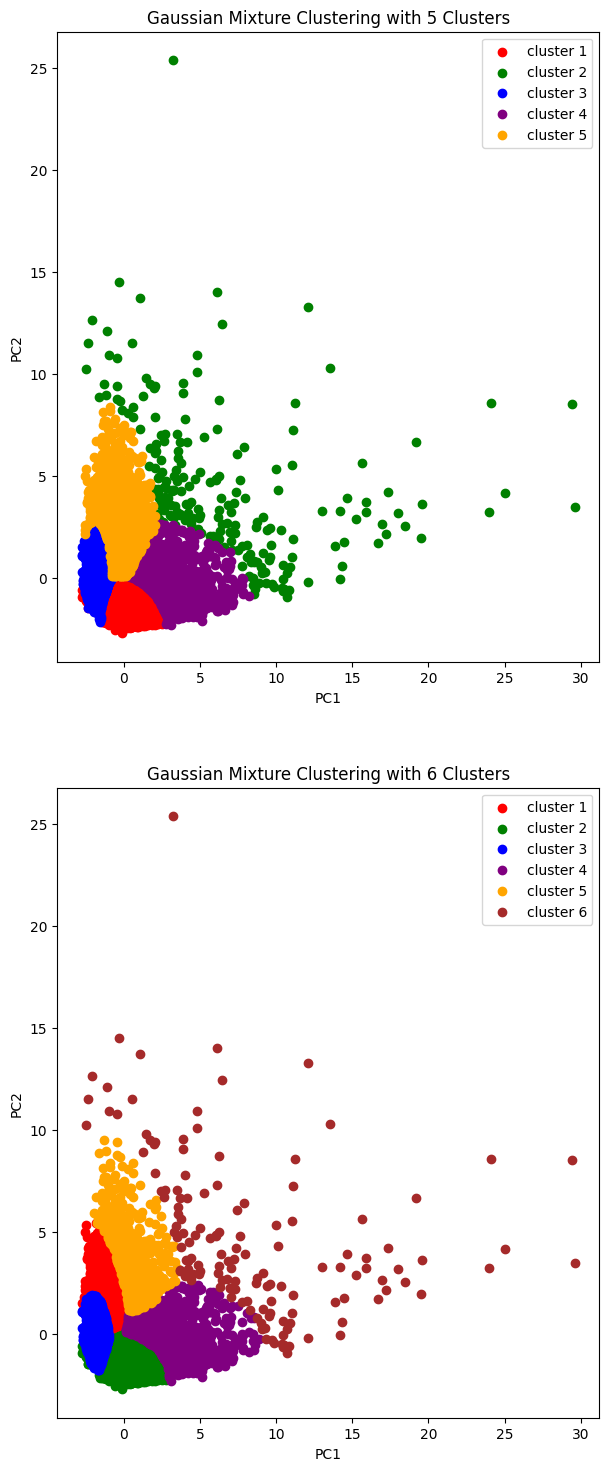

In [66]:
data_p=pd.DataFrame(PCA(n_components=2).fit_transform(data_imputed))
preds=pd.Series(GaussianMixture(n_components=5,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis=1)
data_p.columns=[0,1,'target']

fig=plt.figure(figsize=(7, 18))
colors=['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(211)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

data_p=pd.DataFrame(PCA(n_components=2).fit_transform(data_imputed))
preds=pd.Series(GaussianMixture(n_components=6,).fit_predict(data_p))
data_p=pd.concat([data_p, preds], axis=1)
data_p.columns=[0,1,'target']

plt.subplot(212)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Exploratory Data Analysis
We are picking 6 clusters for this EDA. Let's make a Seaborn pairplot with selected/best columns to show how the clusters are segmenting the samples:

In [67]:
# Select best columns
best_cols=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS']

# Dataframe with best columns
data_final=pd.DataFrame(data_imputed[best_cols])

print(f"New dataframe with best columns has just been created. Data shape: {data_final.shape}")

New dataframe with best columns has just been created. Data shape: (8950, 6)


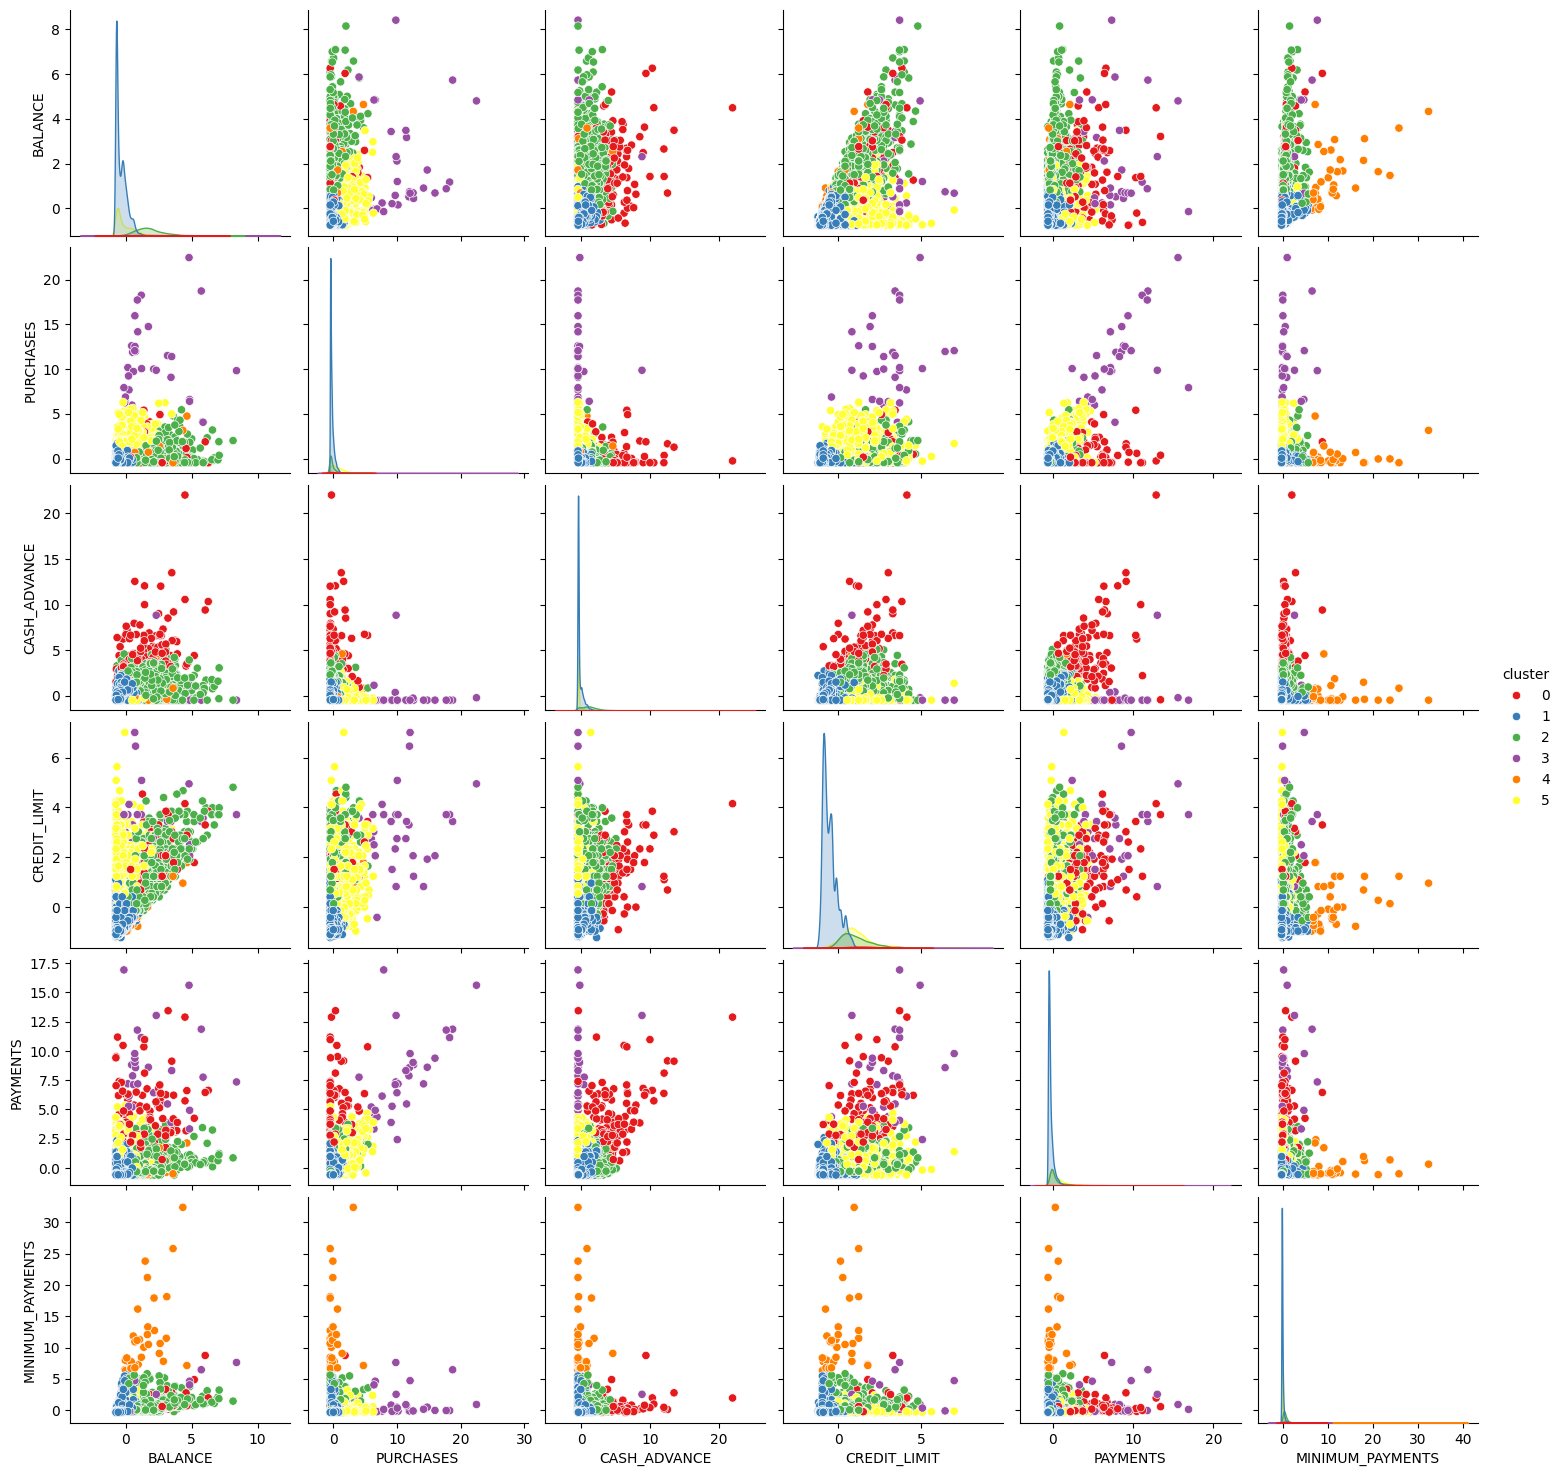

In [68]:
# Apply KMeans clustering
alg=KMeans(n_clusters=6)
label=alg.fit_predict(data_final)

# Create a 'cluster' column
data_final['cluster']=label
best_cols.append('cluster')

# Make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster', palette='Set1')

We can see some interesting correlations between features and clusters that we have made above. Let's get into detailed analysis.

### Cluster 0: The average Joe

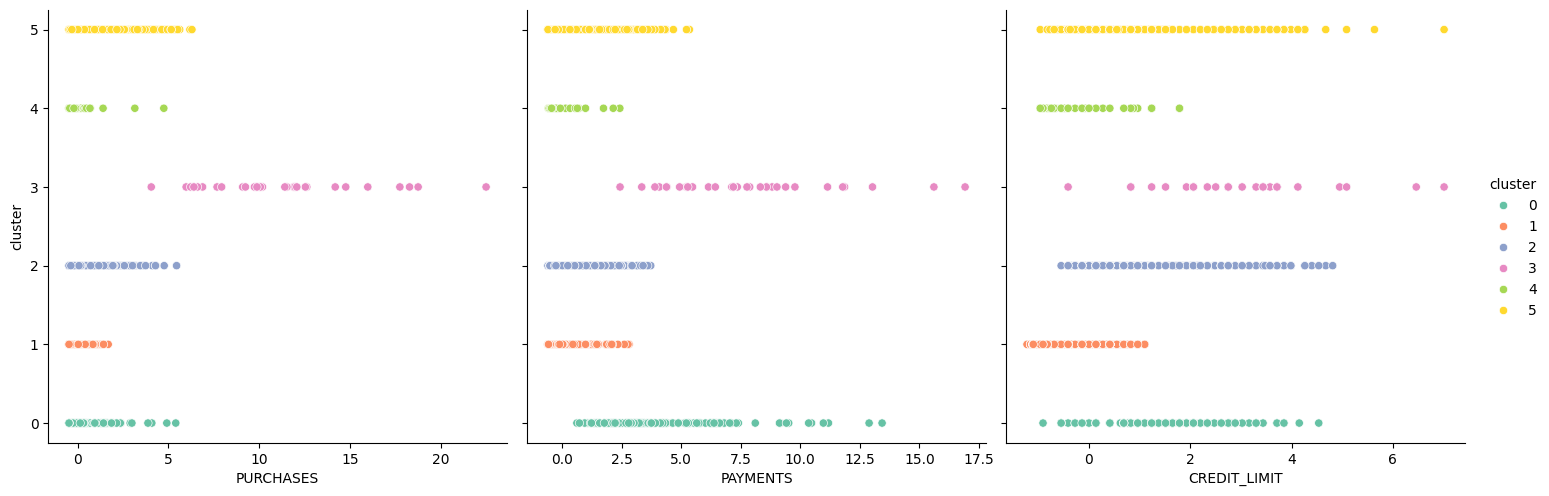

In [71]:
sns.pairplot(data_final[best_cols], hue='cluster',
             x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
             y_vars=['cluster'],
             height=5, 
             aspect=1,
             palette='Set2')

This group of users, while having the highest number of users by fair, is fairly frugal: they have lowest purchases, second lowest payments, and lowest credit limit. The bank would not make much profit from this group, so there should be some sorts of strategy to attract thse people more.

### Cluster 1: The Active Users

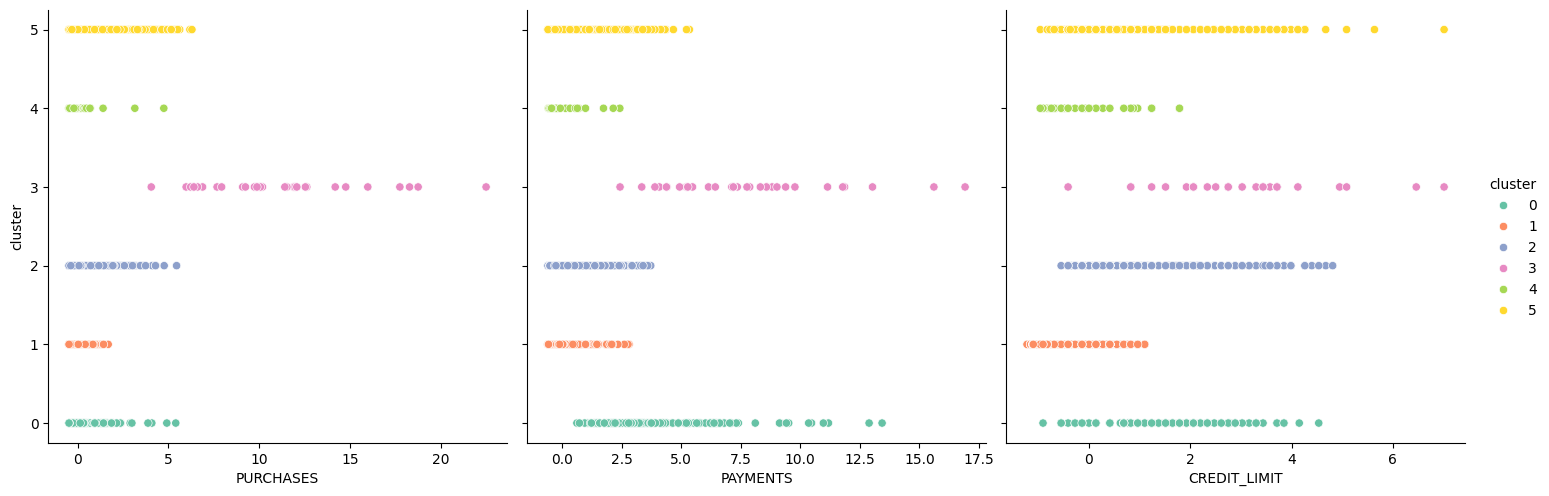

In [72]:
sns.pairplot(data_final[best_cols], hue='cluster', 
            x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, 
            aspect=1, 
            palette='Set2')

This group of users is very active in general: they have second highest purchases, third highest payments, and the most veried credit limit values. This type of credit card users is teh type you should spend the least time and effort on, as they are already the ideal one.

### Cluster 2: The Big Spenders
The Big Spenders. This group is by far the most interesting to analyze, since they do not only have the highest number of purchases, highest payments, highest minumum payments, but the other features are also wildly varied in values. Let's take a quick look at the pairplots.

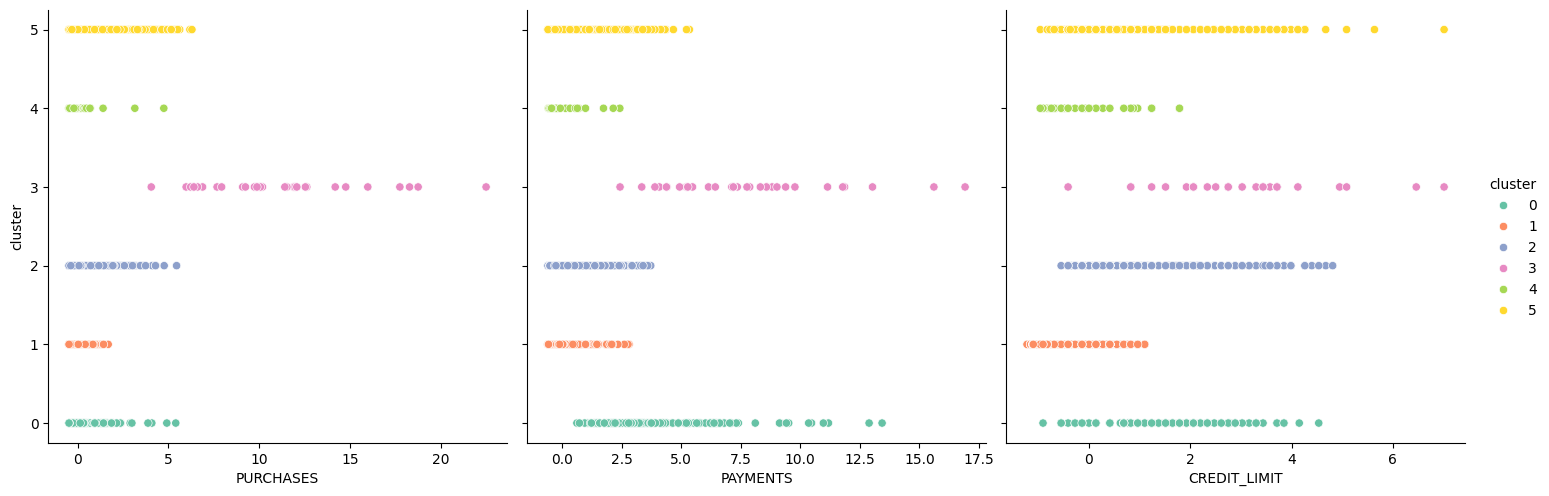

In [73]:
sns.pairplot(data_final[best_cols], hue='cluster',
            x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], 
            y_vars=['cluster'],
            height=5, 
            aspect=1,
            palette='Set2')

As a nature of the "Big Spenders", there are many outliers in this cluster: people who have/make abnormally high balance, purchases, cash advance, and payment. The graph below will give you an impression of how outlier-heavy this cluster is - almost all the green dots are outliers relatively compared to the rest of the whole dataset.

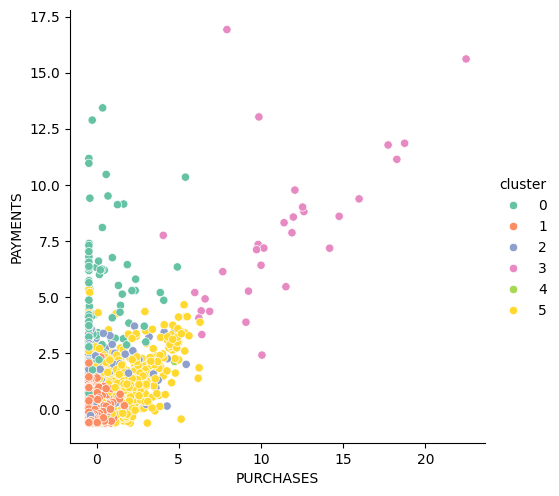

In [74]:
sns.pairplot(data_final[best_cols], hue='cluster', 
            x_vars=['PURCHASES'], 
            y_vars=['PAYMENTS'],
            height=5, 
            aspect=1,
            palette='Set2')

### Cluster 3: The Money Borrowers

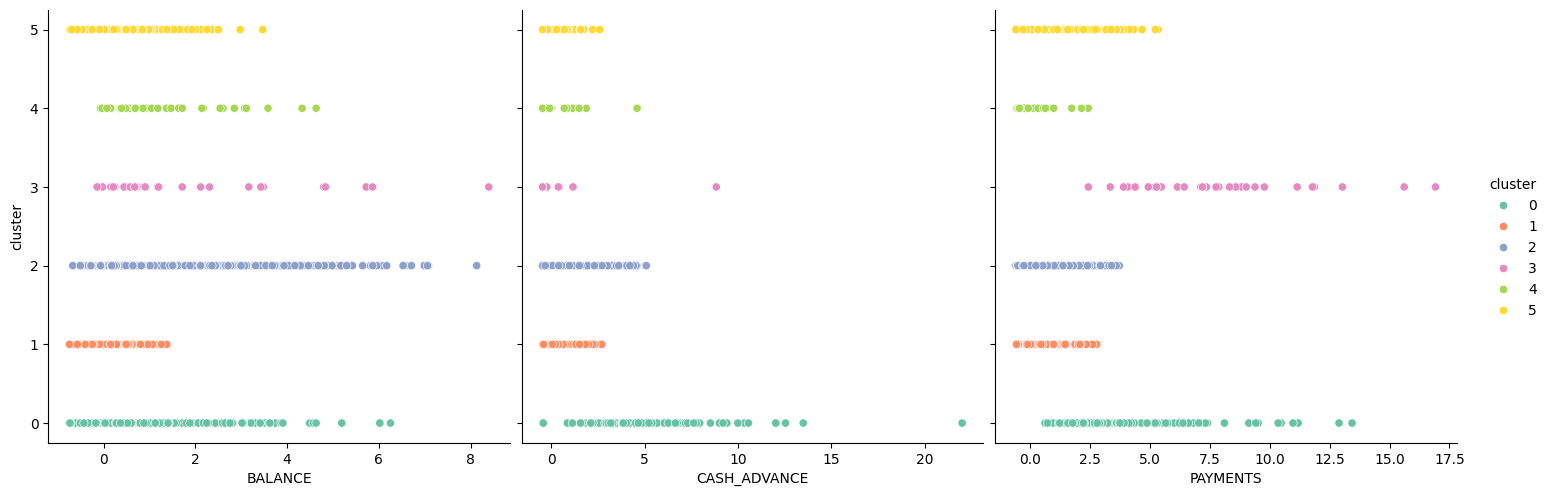

In [75]:
sns.pairplot(data_final[best_cols], hue='cluster', 
            x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'],
            height=5, 
            aspect=1,
            palette='Set2')

Wildly varied balance, second highest payments, average purchases. This special thing about this cluster is that these people have the highest cash advance by far - there is even one extreme case that has like 25 cash advance points. We call these people "The Money Borrowers".

### Cluster 4: The High Riskers

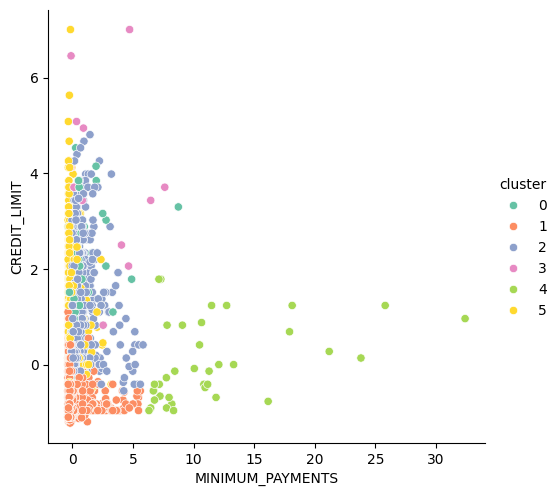

In [76]:
sns.pairplot(data_final[best_cols], hue='cluster', 
            x_vars=['MINIMUM_PAYMENTS'], 
            y_vars=['CREDIT_LIMIT'],
            height=5, 
            aspect=1,
            palette='Set2')

This group has absurdly high minimum payments while having the second lowest credit limit. It looks like the bank has identified then as higher risk.

### Cluster 5: The Wildcards

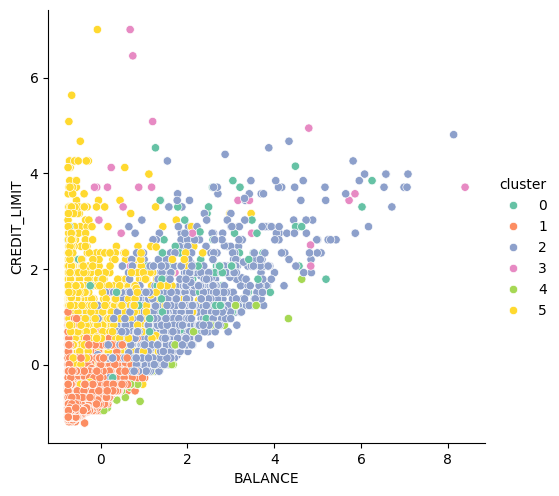

In [77]:
sns.pairplot(data_final[best_cols], hue='cluster',
             x_vars=['BALANCE'],
             y_vars=['CREDIT_LIMIT'],
            height=5, 
            aspect=1, 
            palette='Set2')

This group is troublesome to analyze and come up with a good marketing strategy towards, as both their credit limit and balance values are wildly varied. As you can see, the above graph looks like half of it was made of the color ligth blue.

## Summary and Possible Marketing Strategy
From this dataset, we've gained valuable insights by dividing customers into six distinct groups: the Average Joe, the Active Users, the Big Spenders, the Money Borrowers, the High Riskers, and the Wildcards. In summarizing our cluster analysis, let's review our findings and discuss potential marketing strategies:<br><br>

1. The Average Joe segment consists of individuals who use credit cards sparingly, maintain healthy finances, and have low debts. While encouraging increased credit card usage among this group is beneficial for company profits, we must also prioritize business ethics and social responsibility.

2. It's crucial to identify active customers and tailor appropriate marketing strategies to engage with them effectively. Active Users represent a significant focus for our efforts.

3. The Money Borrowers subgroup highlights individuals who struggle with financial management. This issue requires serious attention and intervention.

4. While we currently manage High Riskers by imposing low credit limits, exploring additional marketing strategies aimed at this customer segment is advisable.

## Conclusion
In this project, we've conducted several tasks including data preprocessing, feature extraction using PCA, examination of different clustering metrics such as inertias and silhouette scores, experimentation with various clustering algorithms including KMeans Clustering, Agglomerative Hierarchical Clustering, and Gaussian Mixture Clustering. We've also created data visualizations and performed business analytics.<br><br>
This project marks my initial venture into the business aspect of Data Science, demonstrating how Machine Learning can be applied to address practical, real-life challenges.